In [15]:
import numpy as np

# Distance matrix
D = np.array([
    [0, 6, 4, 3, 6, 5, 6],   # A
    [6, 0, 7, 8, 5, 8, 4],   # B
    [4, 7, 0, 10, 6, 9, 6],  # C
    [3, 8, 10, 0, 4, 7, 7],  # D
    [6, 5, 6, 4, 0, 5, 3],   # E
    [5, 8, 9, 7, 5, 0, 12],  # F
    [6, 4, 6, 7, 3, 12, 0]   # G
])

# Labels for the taxa
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

def neighbor_joining_first_iteration(D, labels):
    # Number of taxa
    n = len(D)
    
    # Step 1: Compute total distance for each taxa
    R = np.zeros(n)
    for i in range(n):
        R[i] = np.sum(D[i, :]) / (n - 2)
    
    # Step 2: Compute the Q matrix
    Q = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            Q[i, j] = D[i, j] - (R[i] + R[j])
            Q[j, i] = Q[i, j]
    
    # Step 3: Find minimum entry in Q matrix (excluding diagonal)
    np.fill_diagonal(Q, np.inf)
    min_idx = np.unravel_index(np.argmin(Q), Q.shape)
    
    # Taxa to join
    i, j = min_idx
    
    # Step 4: Compute distance from new node to original nodes
    dist_i_new = 0.5 * (D[i, j] + R[i] - R[j])
    dist_j_new = 0.5 * (D[i, j] + R[j] - R[i])
    print(Q)

    print(f"Joining taxa {labels[i]} and {labels[j]}")
    print(f"Distances: {labels[i]} to new node = {dist_i_new}")
    print(f"           {labels[j]} to new node = {dist_j_new}")
    
    return labels[i], labels[j], dist_i_new, dist_j_new
# Run the first iteration
neighbor_joining_first_iteration(D, labels)

[[  inf  -7.6 -10.4 -10.8  -5.8 -10.2  -7.6]
 [ -7.6   inf  -9.   -7.4  -8.4  -8.8 -11.2]
 [-10.4  -9.    inf  -6.2  -8.2  -8.6 -10. ]
 [-10.8  -7.4  -6.2   inf  -9.6 -10.   -8.4]
 [ -5.8  -8.4  -8.2  -9.6   inf -10.  -10.4]
 [-10.2  -8.8  -8.6 -10.  -10.    inf  -4.8]
 [ -7.6 -11.2 -10.   -8.4 -10.4  -4.8   inf]]
Joining taxa B and G
Distances: B to new node = 2.0
           G to new node = 2.0


('B', 'G', 2.0, 2.0)

In [17]:
import numpy as np
import pandas as pd

# Create the distance matrix with float dtype
distance_data = {
    'A': [0, 6, 4, 3, 6, 5, 6],
    'B': [6, 0, 7, 8, 5, 8, 4],
    'C': [4, 7, 0, 10, 6, 9, 6],
    'D': [3, 8, 10, 0, 4, 7, 7],
    'E': [6, 5, 6, 4, 0, 5, 3],
    'F': [5, 8, 9, 7, 5, 0, 12],
    'G': [6, 4, 6, 7, 3, 12, 0]
}

def neighbor_joining_first_iteration(distance_data):
    # Create distance matrix with proper labels
    taxa = list(distance_data.keys())
    D = pd.DataFrame(distance_data, index=taxa, columns=taxa, dtype=float)
    n = len(D)
    
    # Calculate r values
    r = D.sum(axis=1)
    
    # Calculate Q matrix
    Q = pd.DataFrame(index=taxa, columns=taxa)
    for i in taxa:
        for j in taxa:
            Q.loc[i,j] = (n-2) * D.loc[i,j] - r[i] - r[j]
    
    print("\nQ Matrix:")
    print(Q)
    
    # Find minimum Q value
    min_val = float('inf')
    min_i, min_j = None, None
    for i in taxa:
        for j in taxa:
            if i < j and Q.loc[i,j] < min_val:
                min_val = Q.loc[i,j]
                min_i, min_j = i, j
    
    # Calculate branch lengths
    total_dist = D.loc[min_i, min_j]
    dist_i = (total_dist/2) + (r[min_i] - r[min_j])/(2*(n-2))
    dist_j = total_dist - dist_i
    
    # Calculate distances to new node
    new_distances = {}
    for k in taxa:
        if k not in [min_i, min_j]:
            new_distances[k] = (D.loc[k,min_i] + D.loc[k,min_j] - D.loc[min_i,min_j])/2
    
    result = {
        'joined_pair': (min_i, min_j),
        'branch_lengths': (dist_i, dist_j),
        'new_distances': new_distances,
        'Q_matrix': Q
    }
    
    print("\nResults:")
    print(f"Joined pair: {min_i} and {min_j}")
    print(f"Branch lengths: {dist_i:.2f} and {dist_j:.2f}")
    print("\nDistances from new node U to other taxa:")
    for k, v in new_distances.items():
        print(f"{k}: {v:.2f}")
    
    return result

def print_tree_structure(result):
    # Extract results
    joined_pair = result['joined_pair']
    branch_lengths = result['branch_lengths']
    
    # Print tree structure with ASCII art
    print("\nTree structure after first iteration:")
    print("                U")
    print("               / \\")
    print(f"              /   \\")
    print(f"        {branch_lengths[0]:.2f}    {branch_lengths[1]:.2f}")
    print(f"            /       \\")
    print(f"           {joined_pair[0]}         {joined_pair[1]}")

# Run the complete analysis
result = neighbor_joining_first_iteration(distance_data)
print_tree_structure(result)


Q Matrix:
      A     B     C     D     E     F     G
A -60.0 -38.0 -52.0 -54.0 -29.0 -51.0 -38.0
B -38.0 -76.0 -45.0 -37.0 -42.0 -44.0 -56.0
C -52.0 -45.0 -84.0 -31.0 -41.0 -43.0 -50.0
D -54.0 -37.0 -31.0 -78.0 -48.0 -50.0 -42.0
E -29.0 -42.0 -41.0 -48.0 -58.0 -50.0 -52.0
F -51.0 -44.0 -43.0 -50.0 -50.0 -92.0 -24.0
G -38.0 -56.0 -50.0 -42.0 -52.0 -24.0 -76.0

Results:
Joined pair: B and G
Branch lengths: 2.00 and 2.00

Distances from new node U to other taxa:
A: 4.00
C: 4.50
D: 5.50
E: 2.00
F: 8.00

Tree structure after first iteration:
                U
               / \
              /   \
        2.00    2.00
            /       \
           B         G


Pair selected for merging: B and G with distance 4
New distances for merged node: [4.  4.5 5.5 2.  8. ]
Updated Labels: ['A', 'C', 'D', 'E', 'F', '(B-G)']
Updated Distance Matrix:
         A     C     D    E    F  (B-G)
A      0.0   4.0   3.0  6.0  5.0    4.0
C      4.0   0.0  10.0  6.0  9.0    4.5
D      3.0  10.0   0.0  4.0  7.0    5.5
E      6.0   6.0   4.0  0.0  5.0    2.0
F      5.0   9.0   7.0  5.0  0.0    8.0
(B-G)  4.0   4.5   5.5  2.0  8.0    0.0


C:\Users\Nishc\AppData\Local\Temp\ipykernel_42880\2330329576.py:63: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(new_matrix, 'average')


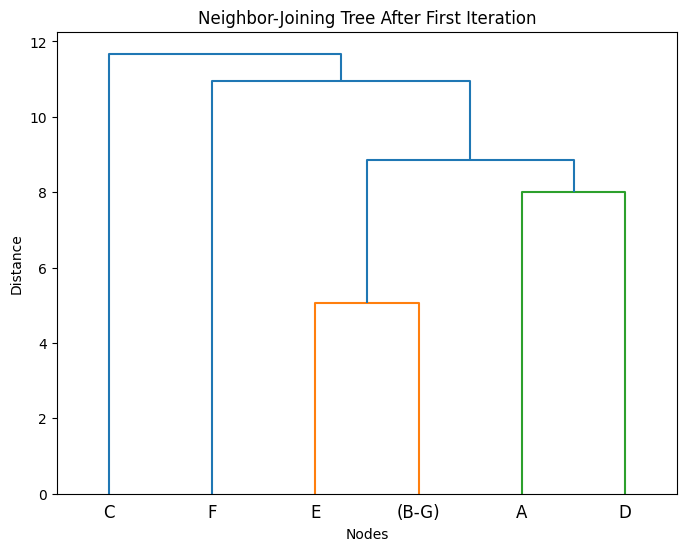

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Input the distance matrix
labels = ["A", "B", "C", "D", "E", "F", "G"]
distance_matrix = np.array([
    [0, 6, 4, 3, 6, 5, 6],  # A
    [6, 0, 7, 8, 5, 8, 4],  # B
    [4, 7, 0, 10, 6, 9, 6],  # C
    [3, 8, 10, 0, 4, 7, 7],  # D
    [6, 5, 6, 4, 0, 5, 3],  # E
    [5, 8, 9, 7, 5, 0, 12],  # F
    [6, 4, 6, 7, 3, 12, 0],  # G
])

# Step 2: Compute total distances (row sums)
total_distances = np.sum(distance_matrix, axis=1)

# Step 3: Create the Q-matrix (pairwise scores)
n = len(labels)
Q_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            Q_matrix[i, j] = (n - 2) * distance_matrix[i, j] - total_distances[i] - total_distances[j]

# Step 4: Identify the pair (i, j) with the minimum Q value
# Ignore diagonal elements explicitly by masking them
np.fill_diagonal(Q_matrix, np.inf)
i, j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
min_distance = distance_matrix[i, j]

# Step 5: Compute the new distances for the merged node
new_label = f"({labels[i]}-{labels[j]})"
new_distances = []

for k in range(n):
    if k != i and k != j:
        d_ik = (distance_matrix[i, k] + distance_matrix[j, k] - min_distance) / 2
        new_distances.append(d_ik)

# Step 6: Update the distance matrix
# Remove rows/columns for nodes i and j, then add new row/column for the merged node
new_labels = [labels[k] for k in range(n) if k != i and k != j] + [new_label]
remaining_matrix = np.delete(distance_matrix, [i, j], axis=0)
remaining_matrix = np.delete(remaining_matrix, [i, j], axis=1)

# Add the new distances as a row/column
new_distances = np.array(new_distances + [0])  # Add 0 for the merged node's distance to itself
new_matrix = np.vstack((remaining_matrix, new_distances[:-1]))
new_matrix = np.column_stack((new_matrix, new_distances))

# Step 7: Output the results
print(f"Pair selected for merging: {labels[i]} and {labels[j]} with distance {min_distance}")
print(f"New distances for merged node: {new_distances[:-1]}")
print(f"Updated Labels: {new_labels}")
print(f"Updated Distance Matrix:\n{pd.DataFrame(new_matrix, index=new_labels, columns=new_labels)}")

# Visualize the tree after first iteration (Using scipy linkage for hierarchical clustering)
Z = linkage(new_matrix, 'average')
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=new_labels, orientation='top', distance_sort='ascending')
plt.title("Neighbor-Joining Tree After First Iteration")
plt.xlabel("Nodes")
plt.ylabel("Distance")
plt.show()


C:\Users\Nishc\AppData\Local\Temp\ipykernel_42880\3451364655.py:18: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, 'average')


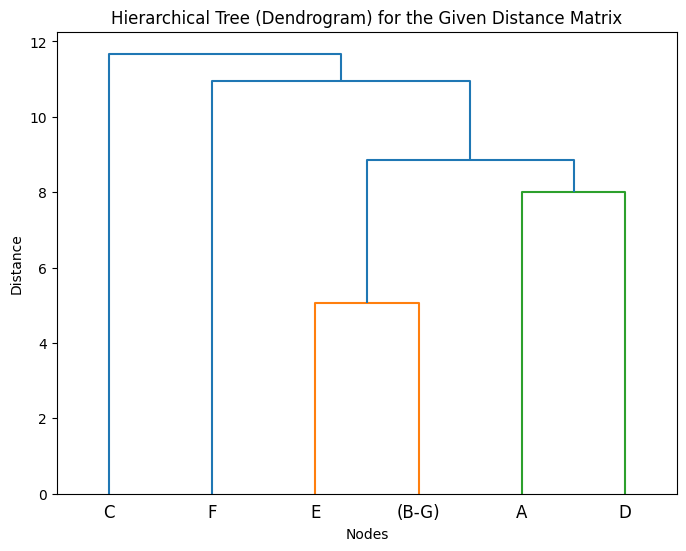

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Define the distance matrix
labels = ["A", "C", "D", "E", "F", "(B-G)"]
distance_matrix = np.array([
    [0.0, 4.0, 3.0, 6.0, 5.0, 4.0],  # A
    [4.0, 0.0, 10.0, 6.0, 9.0, 4.5],  # C
    [3.0, 10.0, 0.0, 4.0, 7.0, 5.5],  # D
    [6.0, 6.0, 4.0, 0.0, 5.0, 2.0],   # E
    [5.0, 9.0, 7.0, 5.0, 0.0, 8.0],   # F
    [4.0, 4.5, 5.5, 2.0, 8.0, 0.0],   # (B-G)
])

# Step 2: Perform hierarchical clustering using the 'average' method
Z = linkage(distance_matrix, 'average')

# Step 3: Create the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=labels, orientation='top', distance_sort='ascending')

# Step 4: Display the plot
plt.title("Hierarchical Tree (Dendrogram) for the Given Distance Matrix")
plt.xlabel("Nodes")
plt.ylabel("Distance")
plt.show()
